In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

**IMPORTING THE DATASET**

In [2]:
dataset = pd.read_csv('BRITANNIA.csv')

In [3]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [4]:
dataset.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5300,2021-04-26,BRITANNIA,EQ,3650.30,3661.10,3662.00,3531.0,3546.0,3539.20,3558.62,1031406,3.670382e+14,72258.0,507276.0,0.4918
5301,2021-04-27,BRITANNIA,EQ,3539.20,3572.70,3574.60,3517.0,3546.0,3541.20,3539.42,813608,2.879697e+14,46189.0,322686.0,0.3966
5302,2021-04-28,BRITANNIA,EQ,3541.20,3488.00,3527.00,3469.0,3470.0,3478.75,3495.13,1498181,5.236339e+14,97170.0,763715.0,0.5098
5303,2021-04-29,BRITANNIA,EQ,3478.75,3496.75,3505.90,3447.0,3464.0,3468.90,3471.18,611087,2.121195e+14,41655.0,309653.0,0.5067
5304,2021-04-30,BRITANNIA,EQ,3468.90,3460.00,3468.35,3437.0,3444.8,3449.00,3450.52,436187,1.505071e+14,34606.0,208365.0,0.4777


In [5]:
dataset.isna().any()

Date                  False
Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume     True
%Deliverble            True
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5305 non-null   object 
 1   Symbol              5305 non-null   object 
 2   Series              5305 non-null   object 
 3   Prev Close          5305 non-null   float64
 4   Open                5305 non-null   float64
 5   High                5305 non-null   float64
 6   Low                 5305 non-null   float64
 7   Last                5305 non-null   float64
 8   Close               5305 non-null   float64
 9   VWAP                5305 non-null   float64
 10  Volume              5305 non-null   int64  
 11  Turnover            5305 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4796 non-null   float64
 14  %Deliverble         4796 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.8

**DATA VISUALISING**

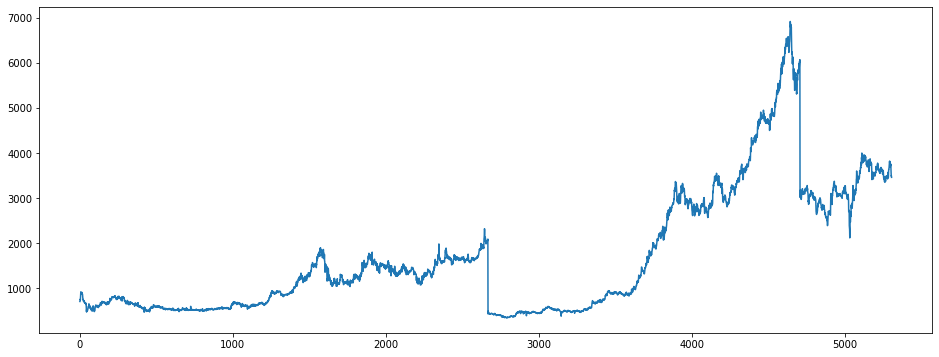

In [7]:
dataset['Open'].plot(figsize=(16,6))

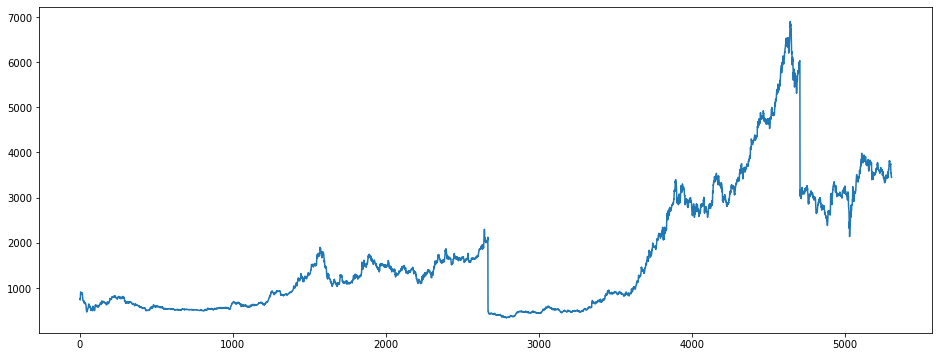

In [8]:
dataset['Close'].plot(figsize=(16,6))

In [9]:
dataset.rolling(7).mean().head(20)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,785.192857,791.142857,823.935714,766.035714,805.414286,806.692857,800.464286,17822.285714,1.479061e+12,NaN,NaN,NaN
7,806.692857,819.000000,844.007143,788.257143,824.407143,824.664286,821.060000,18079.428571,1.517294e+12,NaN,NaN,NaN
8,824.664286,844.714286,865.435714,811.828571,845.121429,842.785714,843.408571,19706.714286,1.681761e+12,NaN,NaN,NaN
9,842.785714,861.500000,882.721429,834.542857,863.692857,861.978571,862.550000,21075.285714,1.813028e+12,NaN,NaN,NaN


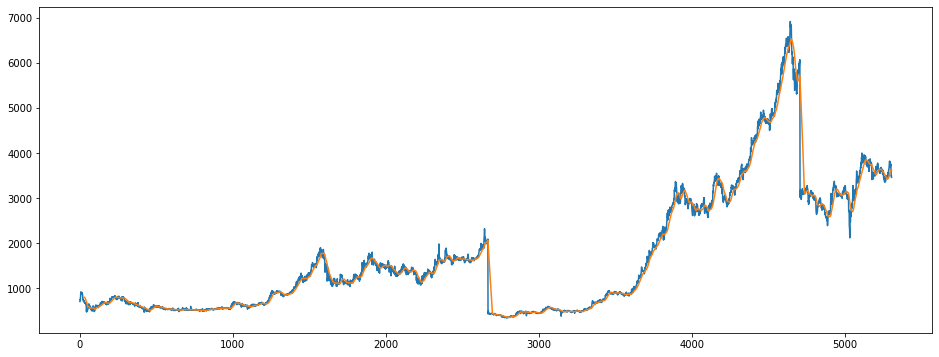

In [10]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

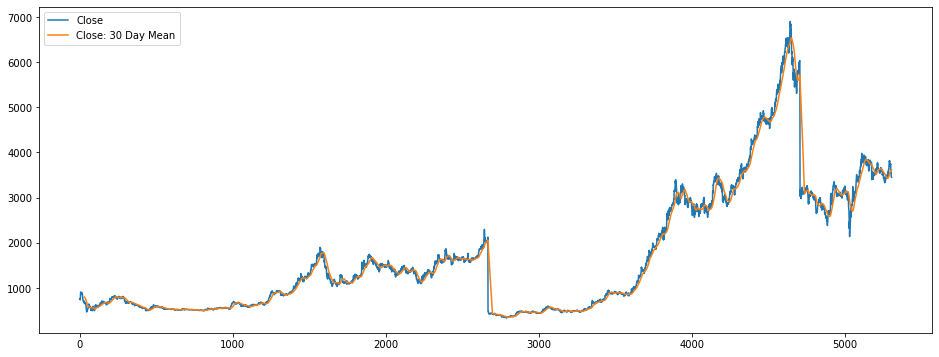

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

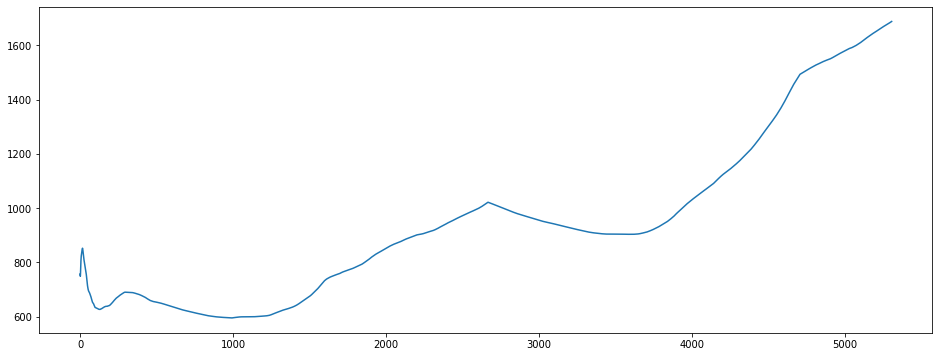

In [12]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

**BUILDING THE RNN MODEL**

In [13]:
training_set = dataset['Open']
training_set=pd.DataFrame(training_set)

In [14]:
training_set.isna().any()

Open    False
dtype: bool

In [15]:
training_set = dataset.iloc[:,4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [16]:
X_train = training_set[0:5303]
y_train = training_set[1:5304]
X_train = np.reshape(X_train,(5303,1,1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
166/166 [==============================] - 7s 6ms/step - loss: 0.0435
Epoch 2/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 3/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 4/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 5/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 6/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 7/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 8/200
166/166 [==============================] - 1s 6ms/step - loss: 9.5960e-04
Epoch 9/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 10/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0013
Epoch 11/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 12/200
166/166 [==============================] - 1s 6ms/step - loss: 9.7171e-04
Epoch

**VISUALING AND PREDICTING THE MODEL ON THE PAST 50 RESPONSES IN THE DATASET**

In [20]:
test_set = pd.read_csv('BRITANNIA.csv')
real_stock_price = dataset.iloc[-50:,4:5].values

In [21]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [22]:
inputs = np.reshape(inputs,(50,1,1))
predict_stock_price = regressor.predict(inputs)

In [23]:
predicted_stock_price = sc.inverse_transform(predict_stock_price)

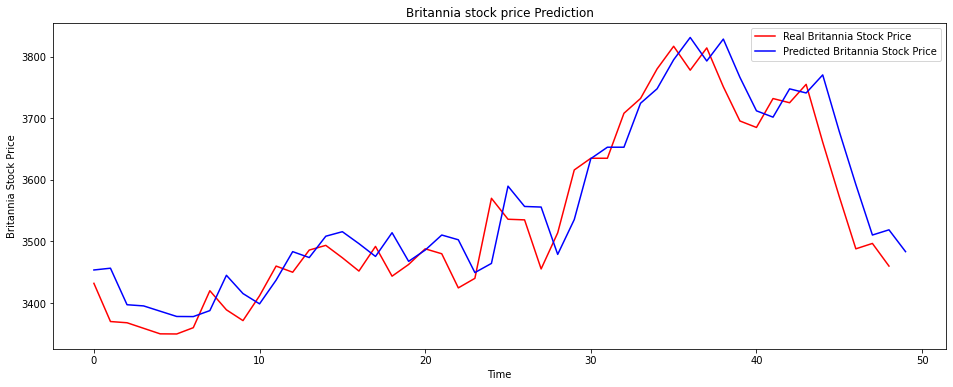

In [24]:
plt.figure(figsize=(16,6))
plt.plot(real_stock_price[1:], color='red', label='Real Britannia Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Britannia Stock Price')
plt.title('Britannia stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Britannia Stock Price')
plt.legend()
plt.show()